## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston (или Fashion_Mnist). 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

### Подключение библиотек и скриптов

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:72.5% !important; }</style>"))

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

### Загрузка данных

In [4]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# (X_train, y_train), (X_test, y_test) = imdb.load_data()

### Изучение датасета

In [5]:
train_data.shape

(25000,)

In [6]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [7]:
test_data.shape

(25000,)

In [8]:
test_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
# train_data[0]

In [10]:
max([max(sequence) for sequence in train_data])

9999

### Построение модели

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  #set specific indices of results[i] to 1s
    return results

# Our vectorized training data
X_train = vectorize_sequences(train_data)
# Our vectorized test data
X_test = vectorize_sequences(test_data)

In [12]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Validating

In [14]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Model - 1

In [15]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(10000,)),
    Dense(512, activation='linear'),
    Dense(1, activation='softmax')
])

In [16]:
model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 14s 17ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5053
Epoch 2/5
782/782 [==============================] - 13s 17ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5053
Epoch 3/5
782/782 [==============================] - 13s 17ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5053
Epoch 4/5
782/782 [==============================] - 13s 17ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5053
Epoch 5/5
782/782 [==============================] - 13s 17ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5053


In [18]:
score = model.evaluate(X_train, y_train, verbose=0)

In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 0.5


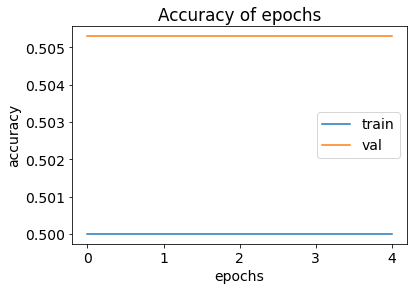

In [20]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 2

In [21]:
model_2 = Sequential([
    Dense(512, activation='relu', input_shape=(10000,)),
    Dense(512, activation='linear'),
    Dense(1, activation='sigmoid')
])

In [22]:
model_2.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [23]:
history_2 = model_2.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 13s 17ms/step - loss: 5.9605e-08 - accuracy: 0.4908 - val_loss: 6.0236e-08 - val_accuracy: 0.4991
Epoch 2/5
782/782 [==============================] - 13s 17ms/step - loss: 5.9605e-08 - accuracy: 0.4908 - val_loss: 6.0236e-08 - val_accuracy: 0.4991
Epoch 3/5
782/782 [==============================] - 13s 17ms/step - loss: 5.9605e-08 - accuracy: 0.4908 - val_loss: 6.0236e-08 - val_accuracy: 0.4991
Epoch 4/5
782/782 [==============================] - 13s 17ms/step - loss: 5.9605e-08 - accuracy: 0.4908 - val_loss: 6.0236e-08 - val_accuracy: 0.4991
Epoch 5/5
782/782 [==============================] - 13s 17ms/step - loss: 5.9605e-08 - accuracy: 0.4908 - val_loss: 6.0236e-08 - val_accuracy: 0.4991


In [24]:
score_2 = model_2.evaluate(X_train, y_train, verbose=0)

In [25]:
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 5.960464477539063e-08
Test accuracy: 0.49083998799324036


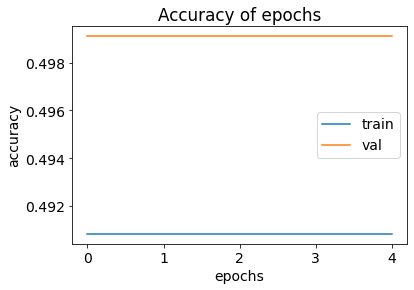

In [26]:
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 3

In [27]:
model_3 = Sequential([
    Dense(512, activation='relu', input_shape=(10000,)),
    Dense(512, activation='linear'),
    Dense(1, activation='sigmoid')
])

In [28]:
model_3.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [29]:
history_3 = model_3.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 13s 17ms/step - loss: 0.3109 - accuracy: 0.8665 - val_loss: 0.1417 - val_accuracy: 0.9594
Epoch 2/5
782/782 [==============================] - 13s 17ms/step - loss: 0.1298 - accuracy: 0.9512 - val_loss: 0.0453 - val_accuracy: 0.9888
Epoch 3/5
782/782 [==============================] - 13s 17ms/step - loss: 0.0361 - accuracy: 0.9877 - val_loss: 0.0316 - val_accuracy: 0.9894
Epoch 4/5
782/782 [==============================] - 13s 17ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0070 - val_accuracy: 0.9985
Epoch 5/5
782/782 [==============================] - 13s 17ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0043 - val_accuracy: 0.9988


In [30]:
score_3 = model_3.evaluate(X_train, y_train, verbose=0)

In [31]:
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

Test loss: 0.0034055239520967007
Test accuracy: 0.9991199970245361


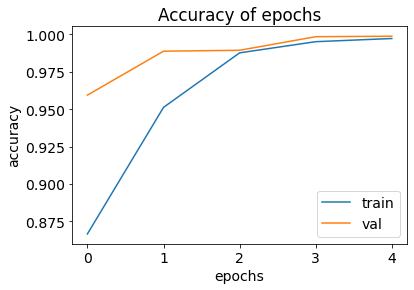

In [32]:
plt.plot(history_3.history['accuracy'], label='train')
plt.plot(history_3.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 4

In [33]:
model_4 = Sequential([
    Flatten(input_shape=(10000,)),
    Dense(512, activation='relu', input_shape=(10000,)),
    Dropout(0.01),
    Dense(1, activation='sigmoid')
])

In [34]:
model_4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
history_4 = model_4.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 28s 36ms/step - loss: 0.3211 - accuracy: 0.8671 - val_loss: 0.1793 - val_accuracy: 0.9341
Epoch 2/5
782/782 [==============================] - 28s 36ms/step - loss: 0.2129 - accuracy: 0.9214 - val_loss: 0.1456 - val_accuracy: 0.9524
Epoch 3/5
782/782 [==============================] - 28s 36ms/step - loss: 0.1710 - accuracy: 0.9370 - val_loss: 0.1223 - val_accuracy: 0.9627
Epoch 4/5
782/782 [==============================] - 28s 36ms/step - loss: 0.1398 - accuracy: 0.9532 - val_loss: 0.0991 - val_accuracy: 0.9698
Epoch 5/5
782/782 [==============================] - 28s 36ms/step - loss: 0.1120 - accuracy: 0.9639 - val_loss: 0.0741 - val_accuracy: 0.9783


In [36]:
score_4 = model_4.evaluate(X_train, y_train, verbose=0)

In [37]:
print('Test loss:', score_4[0])
print('Test accuracy:', score_4[1])

Test loss: 0.07245230674743652
Test accuracy: 0.9779599905014038


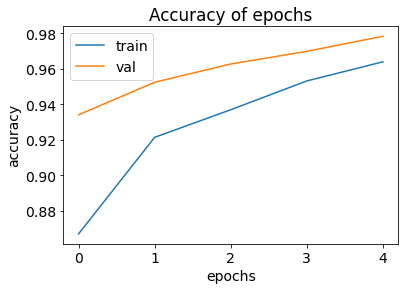

In [38]:
plt.plot(history_4.history['accuracy'], label='train')
plt.plot(history_4.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 5

In [39]:
model_5 = Sequential([
    Dense(512, activation='relu', input_shape=(10000,)),
    Dense(512, activation='linear'),
    Dense(1, activation='sigmoid')
])

In [40]:
model_5.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [41]:
history_5 = model_5.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 29s 38ms/step - loss: 0.3367 - accuracy: 0.8654 - val_loss: 0.2100 - val_accuracy: 0.9204
Epoch 2/5
782/782 [==============================] - 29s 37ms/step - loss: 0.2188 - accuracy: 0.9179 - val_loss: 0.2015 - val_accuracy: 0.9163
Epoch 3/5
782/782 [==============================] - 29s 38ms/step - loss: 0.1769 - accuracy: 0.9366 - val_loss: 0.1199 - val_accuracy: 0.9586
Epoch 4/5
782/782 [==============================] - 29s 37ms/step - loss: 0.1482 - accuracy: 0.9502 - val_loss: 0.1152 - val_accuracy: 0.9637
Epoch 5/5
782/782 [==============================] - 29s 37ms/step - loss: 0.1175 - accuracy: 0.9633 - val_loss: 0.0883 - val_accuracy: 0.9727


In [42]:
score_5 = model_5.evaluate(X_train, y_train, verbose=0)

In [43]:
print('Test loss:', score_5[0])
print('Test accuracy:', score_5[1])

Test loss: 0.08707290887832642
Test accuracy: 0.972760021686554


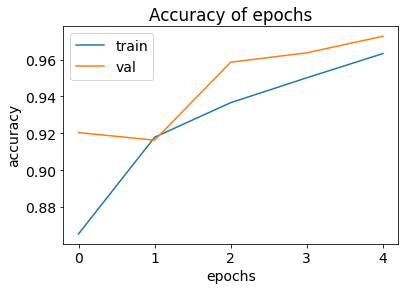

In [44]:
plt.plot(history_5.history['accuracy'], label='train')
plt.plot(history_5.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 6

In [45]:
model_6 = Sequential([
    Dense(512, activation='relu', input_shape=(10000,)),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [46]:
model_6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
history_6 = model_6.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 29s 38ms/step - loss: 0.3300 - accuracy: 0.8640 - val_loss: 0.2113 - val_accuracy: 0.9222
Epoch 2/5
782/782 [==============================] - 29s 37ms/step - loss: 0.2057 - accuracy: 0.9252 - val_loss: 0.1423 - val_accuracy: 0.9515
Epoch 3/5
782/782 [==============================] - 29s 37ms/step - loss: 0.1502 - accuracy: 0.9496 - val_loss: 0.0868 - val_accuracy: 0.9768
Epoch 4/5
782/782 [==============================] - 29s 37ms/step - loss: 0.1037 - accuracy: 0.9700 - val_loss: 0.0520 - val_accuracy: 0.9848
Epoch 5/5
782/782 [==============================] - 29s 37ms/step - loss: 0.0658 - accuracy: 0.9837 - val_loss: 0.0670 - val_accuracy: 0.9894


In [48]:
score_6 = model_6.evaluate(X_train, y_train, verbose=0)

In [49]:
print('Test loss:', score_6[0])
print('Test accuracy:', score_6[1])

Test loss: 0.06078474968671799
Test accuracy: 0.9895200133323669


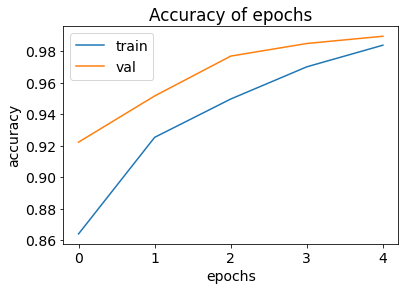

In [50]:
plt.plot(history_6.history['accuracy'], label='train')
plt.plot(history_6.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 7

In [51]:
model_7 = Sequential([
    Flatten(input_shape=(10000,)),
    Dense(512, activation='relu', input_shape=(10000,)),
    Dropout(0.01),
    Dense(1, activation='sigmoid')
])

In [52]:
model_7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
history_7 = model_7.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 13s 17ms/step - loss: 0.3122 - accuracy: 0.8690 - val_loss: 0.1399 - val_accuracy: 0.9557
Epoch 2/5
782/782 [==============================] - 13s 16ms/step - loss: 0.1483 - accuracy: 0.9450 - val_loss: 0.0637 - val_accuracy: 0.9876
Epoch 3/5
782/782 [==============================] - 13s 16ms/step - loss: 0.0480 - accuracy: 0.9844 - val_loss: 0.0121 - val_accuracy: 0.9989
Epoch 4/5
782/782 [==============================] - 13s 16ms/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.0033 - val_accuracy: 0.9999
Epoch 5/5
782/782 [==============================] - 13s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9999


In [54]:
score_7 = model_7.evaluate(X_train, y_train, verbose=0)

In [55]:
print('Test loss:', score_7[0])
print('Test accuracy:', score_7[1])

Test loss: 0.0013097068294882774
Test accuracy: 0.9999600052833557


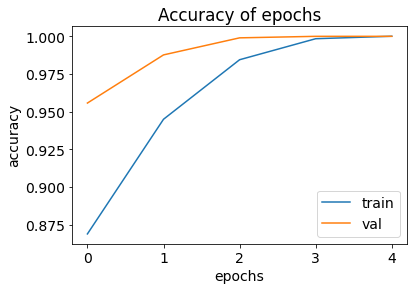

In [56]:
plt.plot(history_7.history['accuracy'], label='train')
plt.plot(history_7.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 8

In [57]:
model_8 = Sequential([
    Flatten(input_shape=(10000,)),
    Dense(512, activation='relu', input_shape=(10000,)),
    Dropout(0.01),
    Dense(1, activation='sigmoid')
])

In [58]:
model_8.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [59]:
history_8 = model_8.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 9s 11ms/step - loss: 0.5680 - accuracy: 0.7536 - val_loss: 0.4438 - val_accuracy: 0.8280
Epoch 2/5
782/782 [==============================] - 8s 11ms/step - loss: 0.3881 - accuracy: 0.8463 - val_loss: 0.3399 - val_accuracy: 0.8660
Epoch 3/5
782/782 [==============================] - 8s 11ms/step - loss: 0.3232 - accuracy: 0.8712 - val_loss: 0.2978 - val_accuracy: 0.8828
Epoch 4/5
782/782 [==============================] - 8s 11ms/step - loss: 0.2894 - accuracy: 0.8858 - val_loss: 0.2677 - val_accuracy: 0.8968
Epoch 5/5
782/782 [==============================] - 8s 11ms/step - loss: 0.2655 - accuracy: 0.8952 - val_loss: 0.2473 - val_accuracy: 0.9074


In [60]:
score_8 = model_8.evaluate(X_train, y_train, verbose=0)

In [61]:
print('Test loss:', score_8[0])
print('Test accuracy:', score_8[1])

Test loss: 0.24683021008968353
Test accuracy: 0.9068800210952759


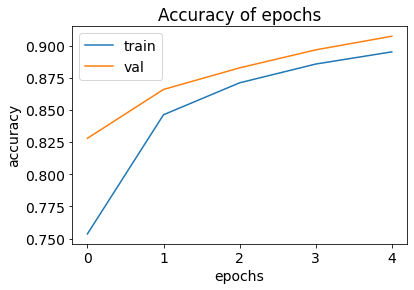

In [62]:
plt.plot(history_8.history['accuracy'], label='train')
plt.plot(history_8.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 9

In [63]:
model_9 = Sequential([
    Dense(512, activation='relu', input_shape=(10000,)),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [64]:
model_9.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [65]:
history_9 = model_9.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 9s 11ms/step - loss: 0.5758 - accuracy: 0.7402 - val_loss: 0.4197 - val_accuracy: 0.8314
Epoch 2/5
782/782 [==============================] - 9s 11ms/step - loss: 0.3503 - accuracy: 0.8562 - val_loss: 0.3124 - val_accuracy: 0.8698
Epoch 3/5
782/782 [==============================] - 9s 11ms/step - loss: 0.2835 - accuracy: 0.8859 - val_loss: 0.2508 - val_accuracy: 0.8985
Epoch 4/5
782/782 [==============================] - 9s 11ms/step - loss: 0.2478 - accuracy: 0.9017 - val_loss: 0.2230 - val_accuracy: 0.9136
Epoch 5/5
782/782 [==============================] - 9s 11ms/step - loss: 0.2228 - accuracy: 0.9126 - val_loss: 0.2467 - val_accuracy: 0.8917


In [66]:
score_9 = model_9.evaluate(X_train, y_train, verbose=0)

In [67]:
print('Test loss:', score_9[0])
print('Test accuracy:', score_9[1])

Test loss: 0.24517497420310974
Test accuracy: 0.8932399749755859


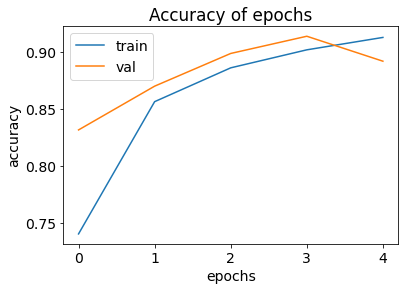

In [68]:
plt.plot(history_9.history['accuracy'], label='train')
plt.plot(history_9.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 10

In [69]:
model_10 = Sequential([
    Dense(512, activation='relu', input_shape=(10000,)),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [70]:
model_10.compile(optimizer='sgd',
              loss='KLDivergence',
              metrics=['accuracy'])

In [71]:
history_10 = model_10.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 10s 12ms/step - loss: 0.0316 - accuracy: 0.4997 - val_loss: 0.0030 - val_accuracy: 0.5053
Epoch 2/5
782/782 [==============================] - 9s 11ms/step - loss: 0.0018 - accuracy: 0.5000 - val_loss: 0.0012 - val_accuracy: 0.5053
Epoch 3/5
782/782 [==============================] - 9s 11ms/step - loss: 9.5344e-04 - accuracy: 0.5000 - val_loss: 7.5296e-04 - val_accuracy: 0.5053
Epoch 4/5
782/782 [==============================] - 9s 11ms/step - loss: 6.3497e-04 - accuracy: 0.5000 - val_loss: 5.3631e-04 - val_accuracy: 0.5053
Epoch 5/5
782/782 [==============================] - 9s 11ms/step - loss: 4.7304e-04 - accuracy: 0.5000 - val_loss: 4.1379e-04 - val_accuracy: 0.5053


In [72]:
score_10 = model_10.evaluate(X_train, y_train, verbose=0)

In [73]:
print('Test loss:', score_10[0])
print('Test accuracy:', score_10[1])

Test loss: 0.0004169392050243914
Test accuracy: 0.5


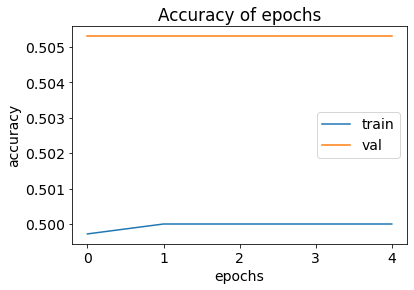

In [74]:
plt.plot(history_10.history['accuracy'], label='train')
plt.plot(history_10.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 11

In [75]:
model_11 = Sequential([
    Flatten(input_shape=(10000,)),
    Dense(512, activation='relu', input_shape=(10000,)),
    Dropout(0.01),
    Dense(1, activation='sigmoid')
])

In [76]:
model_11.compile(optimizer='sgd',
              loss='Poisson',
              metrics=['accuracy'])

In [77]:
history_11 = model_11.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 9s 11ms/step - loss: 0.8121 - accuracy: 0.6970 - val_loss: 0.7751 - val_accuracy: 0.7680
Epoch 2/5
782/782 [==============================] - 8s 11ms/step - loss: 0.7370 - accuracy: 0.8080 - val_loss: 0.7136 - val_accuracy: 0.8323
Epoch 3/5
782/782 [==============================] - 8s 11ms/step - loss: 0.6934 - accuracy: 0.8411 - val_loss: 0.6832 - val_accuracy: 0.8483
Epoch 4/5
782/782 [==============================] - 9s 11ms/step - loss: 0.6709 - accuracy: 0.8578 - val_loss: 0.6657 - val_accuracy: 0.8632
Epoch 5/5
782/782 [==============================] - 8s 11ms/step - loss: 0.6564 - accuracy: 0.8712 - val_loss: 0.6531 - val_accuracy: 0.8762


In [78]:
score_11 = model_11.evaluate(X_train, y_train, verbose=0)

In [79]:
print('Test loss:', score_11[0])
print('Test accuracy:', score_11[1])

Test loss: 0.6476739645004272
Test accuracy: 0.876800000667572


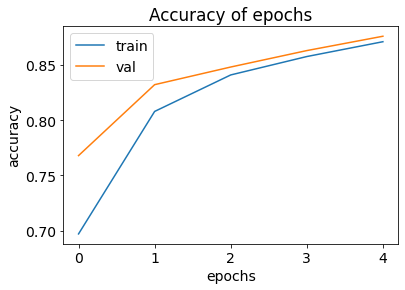

In [80]:
plt.plot(history_11.history['accuracy'], label='train')
plt.plot(history_11.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Model - 12

In [81]:
model_12 = Sequential([
    Flatten(input_shape=(10000,)),
    Dense(512, activation='relu', input_shape=(10000,)),
    Dropout(0.01),
    Dense(1, activation='sigmoid')
])

In [82]:
model_12.compile(optimizer='Adagrad',
              loss='Poisson',
              metrics=['accuracy'])

In [83]:
history_12 = model_12.fit(X_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 11s 14ms/step - loss: 0.8376 - accuracy: 0.6080 - val_loss: 0.8302 - val_accuracy: 0.6777
Epoch 2/5
782/782 [==============================] - 11s 14ms/step - loss: 0.8137 - accuracy: 0.7218 - val_loss: 0.8058 - val_accuracy: 0.7391
Epoch 3/5
782/782 [==============================] - 11s 14ms/step - loss: 0.7884 - accuracy: 0.7632 - val_loss: 0.7810 - val_accuracy: 0.7706
Epoch 4/5
782/782 [==============================] - 11s 14ms/step - loss: 0.7644 - accuracy: 0.7856 - val_loss: 0.7590 - val_accuracy: 0.8042
Epoch 5/5
782/782 [==============================] - 11s 14ms/step - loss: 0.7441 - accuracy: 0.8054 - val_loss: 0.7408 - val_accuracy: 0.8059


In [84]:
score_12 = model_12.evaluate(X_train, y_train, verbose=0)

In [85]:
print('Test loss:', score_12[0])
print('Test accuracy:', score_12[1])

Test loss: 0.7347714304924011
Test accuracy: 0.8080000281333923


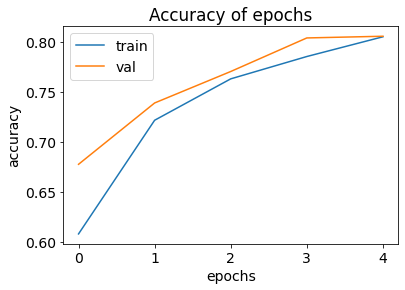

In [86]:
plt.plot(history_12.history['accuracy'], label='train')
plt.plot(history_12.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

### Results

In [87]:
results = pd.DataFrame({'model_1': score, 'model_2': score_2, 'model_3': score_3, 'model_4': score_4,
                        'model_5': score_5, 'model_6': score_6, 'model_7': score_7, 'model_8': score_8, 
                        'model_9': score_9, 'model_10': score_10, 'model_11': score_11, 'model_12': score_12}).T
results.columns=['loss', 'accuracy']
results

,loss,accuracy
model_1,0.00000,0.50000
model_2,0.00000,0.49084
model_3,0.00341,0.99912
model_4,0.07245,0.97796
model_5,0.08707,0.97276
model_6,0.06078,0.98952
model_7,0.00131,0.99996
model_8,0.24683,0.90688
model_9,0.24517,0.89324
model_10,0.00042,0.50000


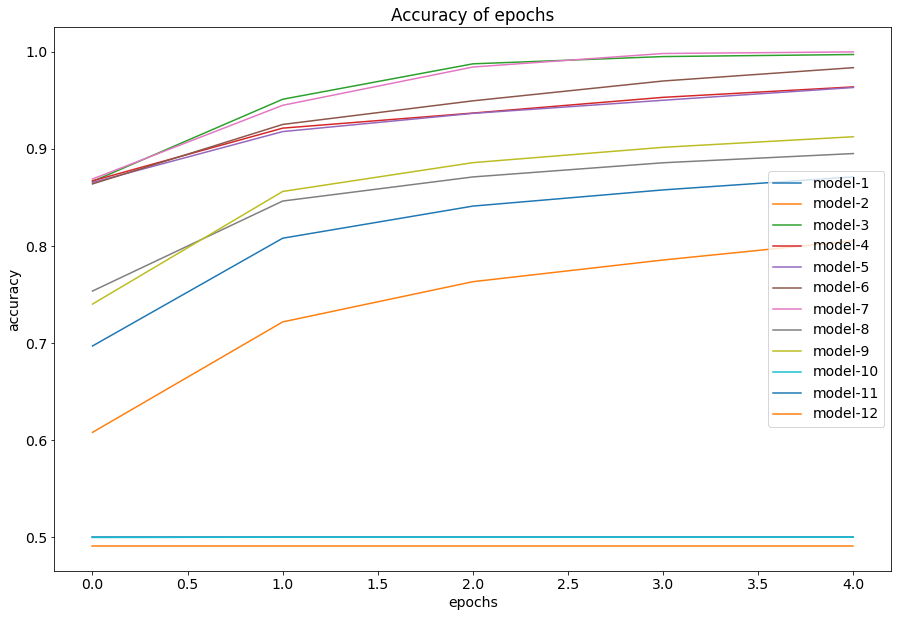

In [114]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'], label='model-1')
plt.plot(history_2.history['accuracy'], label='model-2')
plt.plot(history_3.history['accuracy'], label='model-3')
plt.plot(history_4.history['accuracy'], label='model-4')
plt.plot(history_5.history['accuracy'], label='model-5')
plt.plot(history_6.history['accuracy'], label='model-6')
plt.plot(history_7.history['accuracy'], label='model-7')
plt.plot(history_8.history['accuracy'], label='model-8')
plt.plot(history_9.history['accuracy'], label='model-9')
plt.plot(history_10.history['accuracy'], label='model-10')
plt.plot(history_11.history['accuracy'], label='model-11')
plt.plot(history_12.history['accuracy'], label='model-12')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy of epochs')
plt.show()

In [89]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 513       
Total params: 5,121,025
Trainable params: 5,121,025
Non-trainable params: 0
_________________________________________________________________


При построении нейронной сети для текущего набора данных не подходит метод активации нейронов 'softmax', а также функция потерь(loss) 'categorical_crossentropy' и 'KLDivergence'. Лучшие результаты показала модель с активатором нейронов 'sigmoid', типом оптимизатора 'Adam' и функцией потерь 'binary_crossentropy', также удалось удачно подобрать число слоев и число нейронов. Другие метрики к итоговым моделям не добавлялись, остались только в качестве экспериментов.